In [ ]:
import numpy as np 

from sklearn.metrics import accuracy_score

In [ ]:
from keras.datasets import reuters 
from keras.preprocessing.sequence import pad_sequences 
from keras.utils.np_utils import to_categorical

In [ ]:
# parameters for data load 
max_len=50
number_words = 30000
test_spilt = 0.3

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = number_words,maxlen = max_len, test_split = test_spilt)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 23, 24, 25, 28, 30, 32, 34, 36, 37, 38, 39, 45])

In [ ]:
#Post ===> 0's appended to the end of the i/p Sequences
X_train = pad_sequences(x_train,padding = 'post')
X_test = pad_sequences(x_test,padding = 'post')

In [ ]:
y_data = np.concatenate((y_train,y_test))
y_data = to_categorical(y_data)

In [ ]:
y_train = y_data[:1395]
y_test = y_data[1395:]

In [ ]:
y_test.shape

(599, 46)

In [ ]:
## RNN INPUT_STRUCTURE -----> (batch_size,timesteps,input_dim)
#Convert out input data ------> (Number_of_samples,number_words,1)
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train.shape

(1395, 49, 1)

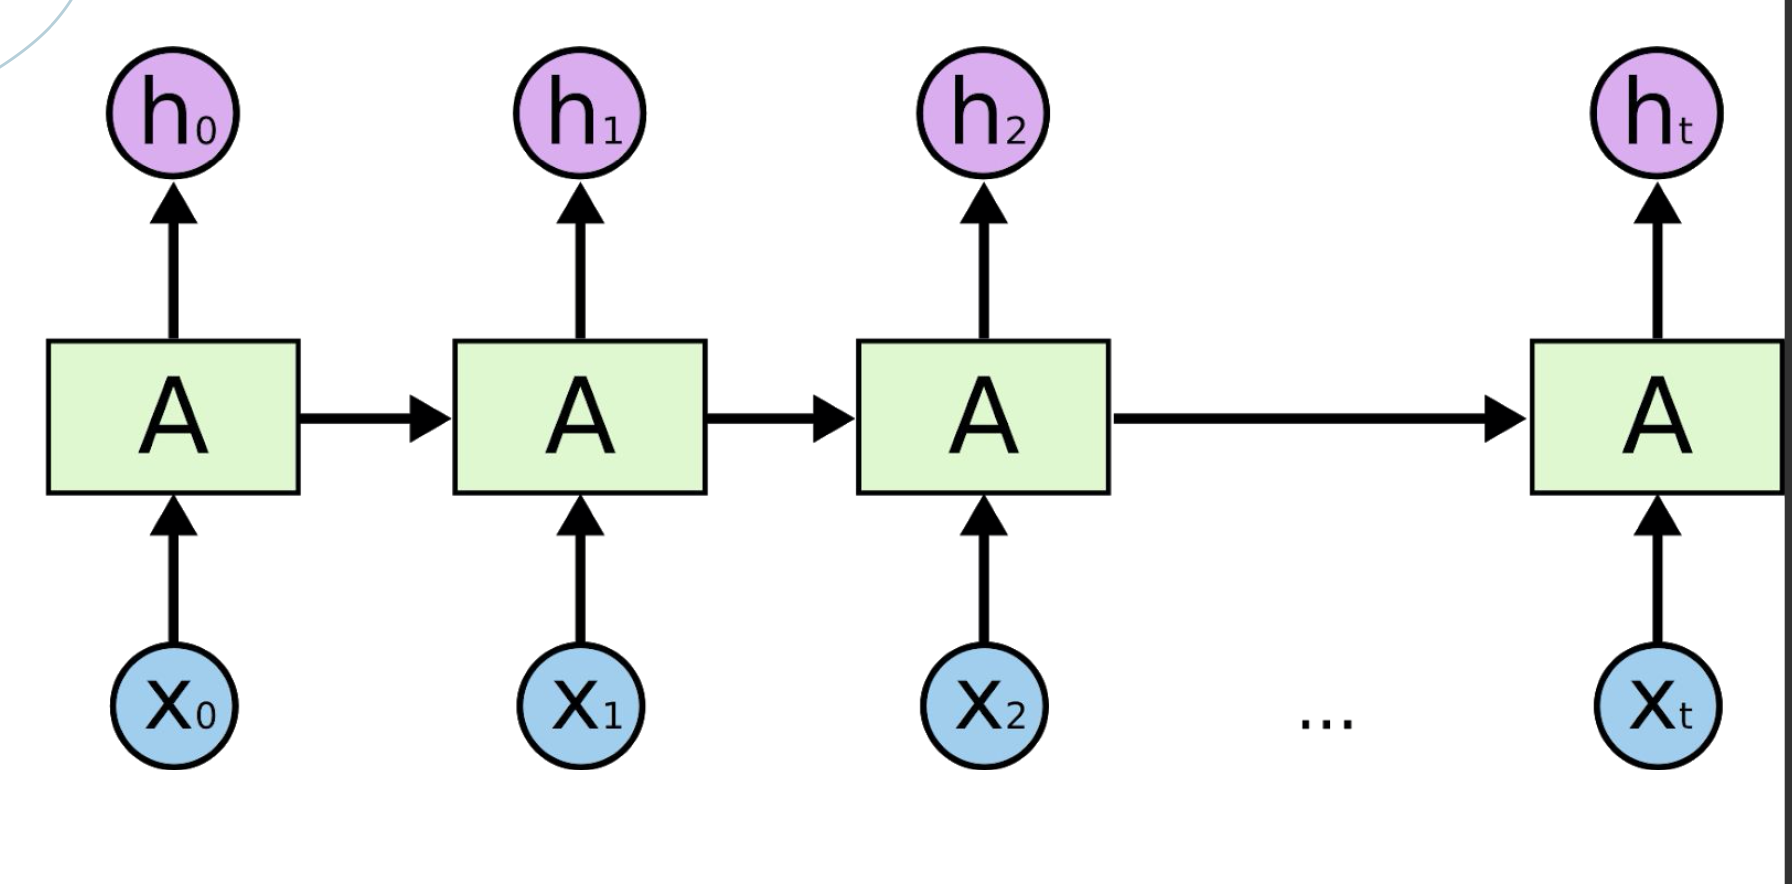

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation 
from keras import optimizers 
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def vanilla_rnn():
  model = Sequential()
  model.add(SimpleRNN(50, input_shape = (49, 1), return_sequences= False))
  model.add(Dense(46))
  model.add(Activation("softmax"))

  adam = optimizers.Adam(lr=0.001)
  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn=vanilla_rnn,epochs = 200, batch_size = 50,verbose = 1)
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 1s 4ms/step


In [ ]:
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred,y_test_))

0.7595993322203672


###  STACKED RNN 

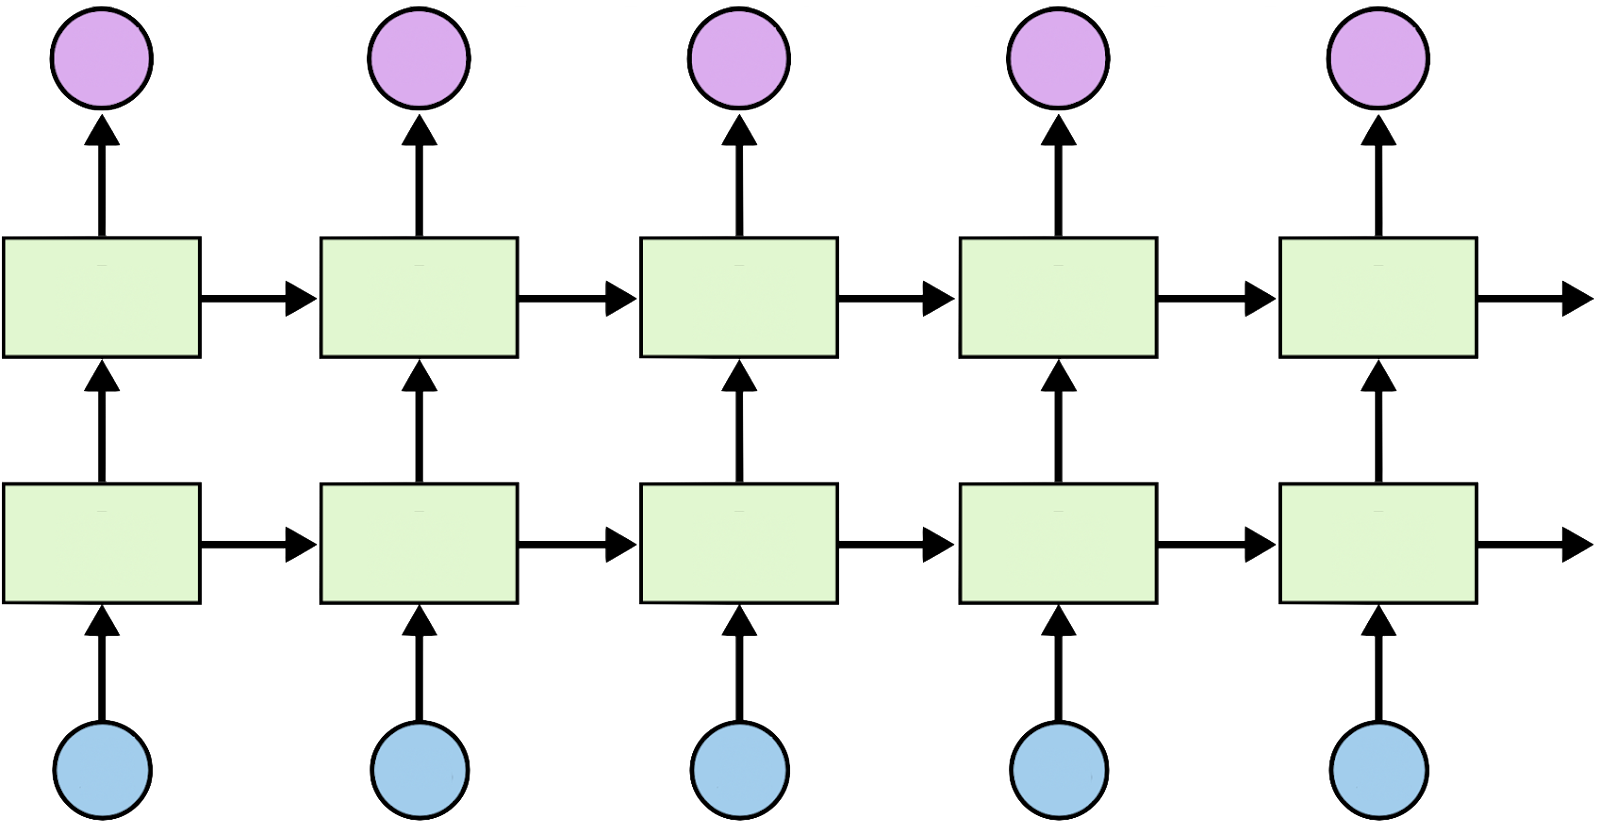

In [ ]:
def stacked_rnn():
  model = Sequential()
  model.add(SimpleRNN(50, input_shape = (49, 1), return_sequences= True))
  model.add(SimpleRNN(50, return_sequences= False))
  model.add(Dense(46))
  model.add(Activation("softmax"))

  adam = optimizers.Adam(lr=0.001)
  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn=stacked_rnn,epochs = 200, batch_size = 50,verbose = 1)
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 1s 8ms/step


In [ ]:
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred,y_test_))

0.7278797996661102


In [ ]:
## LSTM 
from keras.layers import LSTM

def LSTM_class():
  model = Sequential()
  model.add(LSTM(50, input_shape = (49, 1), return_sequences= False))
  model.add(Dense(46))
  model.add(Activation("softmax"))

  adam = optimizers.Adam(lr=0.001)
  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn=LSTM_class,epochs = 200, batch_size = 50,verbose = 0)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred,y_test_))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8564273789649416


In [ ]:
from keras.layers import *

In [ ]:
rnn = SimpleRNN(50)(Input(shape = (49,1)))
print(rnn.shape)

(None, 50)


In [ ]:
rnn = SimpleRNN(5, return_sequences= True)(Input(shape = (49,1)))
print(rnn.shape)

(None, 49, 5)


In [ ]:
from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense

txt1="""What makes this problem difficult is that the sequences can vary in length,
be comprised of a very large vocabulary of input symbols and may require the model 
to learn the long term context or dependencies between symbols in the input sequence."""

#txt1 is used for fitting 
tk = Tokenizer(nb_words=2000, lower=True, split=" ")
tk.fit_on_texts(txt1)

#convert text to sequence
t= tk.texts_to_sequences(txt1)

#padding to feed the sequence to keras model
t=pad_sequences(t, maxlen=10)

model = Sequential()
model.add(Dense(10,input_dim=10))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#predicting new sequcenc
pred=model.predict(t)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
text = tk.sequences_to_texts(pred)

In [ ]:
text